In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Data loading

In [2]:
colsname = ['x', 'y', 'z', 'xn', 'yn', 'zn', 'R', 'G', 'B', 'A', 'quality', 'zz']
lidar = pd.read_csv('../data/20180911_SHCCurb3.ply',
                    delimiter=' ',
                    skiprows=18,
                    #nrows=500000, #use None to read the complete dataset or the number of first rows to read
                    header=None,
                    #error_bad_lines=False,
                    #keep_default_na=False,
                    #dtype={0:'float', 1:'float', 2:'float', 3:'float', 4:'int', 5:'int', 6:'int'},
                    #skipfooter=20, engine='python',
                    #
                    )
lidar.columns=colsname
lidar.drop(['zz'], inplace=True, axis=1)
lidar.head()

,x,y,z,xn,yn,zn,R,G,B,A,quality
0,6.531357,-6.797287,-2.386337,0.035693,-0.037846,0.998646,121,142,104,255,0.193973
1,6.504440,-6.783005,-2.385269,0.044266,-0.033033,0.998474,87,106,78,255,0.188113
2,6.539658,-6.819748,-2.388138,0.050499,-0.032237,0.998204,130,147,110,255,0.190311
3,6.489365,-6.780930,-2.385605,0.051617,-0.021600,0.998433,92,113,81,255,0.195926
4,6.523087,-6.816177,-2.387894,0.046914,-0.039101,0.998133,114,133,97,255,0.185672


# convert coordinates from cartesian to spherical
https://stackoverflow.com/questions/4116658/faster-numpy-cartesian-to-spherical-coordinate-conversion/4116803#4116803

In [3]:
def appendSpherical_np(xyz):
    ptsnew = np.hstack((xyz, np.zeros(xyz.shape)))
    xy = xyz[:,0]**2 + xyz[:,1]**2
    ptsnew[:,3] = np.sqrt(xy + xyz[:,2]**2)
    ptsnew[:,4] = np.arctan2(np.sqrt(xy), xyz[:,2]) # theta
    ptsnew[:,5] = np.arctan2(xyz[:,1], xyz[:,0])  # phi
    return ptsnew

In [4]:
appendSpherical_np(lidar[['x', 'y', 'z']].values)[:,3:]

array([[ 9.72400839,  1.81873555, -0.80534728],
       [ 9.69569001,  1.81936134, -0.80635962],
       [ 9.74573202,  1.81836192, -0.80636084],
       ...,
       [11.72595331,  1.75620833, -1.24935564],
       [11.79430469,  1.75519777, -1.24935615],
       [11.86561616,  1.75420771, -1.2493561 ]])

In [5]:
(24+36)/2

30.0

In [6]:
spherical = pd.DataFrame(appendSpherical_np(lidar[['x', 'y', 'z']].values)[:,3:], columns=['distance', 'theta', 'phi'])
dataset = pd.concat([lidar, spherical], axis=1)
dataset.head()

,x,y,z,xn,yn,zn,R,G,B,A,quality,distance,theta,phi
0,6.531357,-6.797287,-2.386337,0.035693,-0.037846,0.998646,121,142,104,255,0.193973,9.724008,1.818736,-0.805347
1,6.504440,-6.783005,-2.385269,0.044266,-0.033033,0.998474,87,106,78,255,0.188113,9.695690,1.819361,-0.806360
2,6.539658,-6.819748,-2.388138,0.050499,-0.032237,0.998204,130,147,110,255,0.190311,9.745732,1.818362,-0.806361
3,6.489365,-6.780930,-2.385605,0.051617,-0.021600,0.998433,92,113,81,255,0.195926,9.684213,1.819698,-0.807366
4,6.523087,-6.816177,-2.387894,0.046914,-0.039101,0.998133,114,133,97,255,0.185672,9.732059,1.818691,-0.807367


In [7]:
dataset.describe()

,x,y,z,xn,yn,zn,R,G,B,A,quality,distance,theta,phi
count,29183.000000,29183.000000,29183.000000,29183.000000,29183.000000,29183.000000,29183.000000,29183.000000,29183.000000,29183.0,29183.000000,29183.000000,29183.000000,29183.000000
mean,4.932356,-8.720809,-2.270046,0.036247,0.127371,0.925469,66.976836,74.691019,58.740739,255.0,0.203770,10.319128,1.795760,-1.054132
std,0.898344,1.196609,0.076286,0.057298,0.288633,0.198451,47.845634,55.350114,42.502612,0.0,0.051759,1.137550,0.028566,0.092776
min,3.398544,-11.132130,-2.464401,-0.737330,-0.172412,0.016637,1.000000,0.000000,0.000000,255.0,0.126833,7.931027,1.736049,-1.249364
25%,4.163605,-9.627823,-2.329056,0.023887,-0.023591,0.989550,27.000000,27.000000,23.000000,255.0,0.180789,9.474003,1.772146,-1.123095
50%,4.904037,-8.750076,-2.268173,0.050224,0.000033,0.997379,61.000000,66.000000,53.000000,255.0,0.192508,10.240850,1.797578,-1.058932
75%,5.689209,-7.674621,-2.204086,0.063133,0.112833,0.998382,105.000000,120.000000,92.000000,255.0,0.217899,11.163696,1.819034,-0.988773
max,6.580704,-6.780930,-2.090378,0.428332,0.999164,1.000000,228.000000,243.000000,207.000000,255.0,0.955459,13.073367,1.854466,-0.805347


In [19]:
class Camera():
    def __init__(self, scene, focal=50, sqsensor=30, pixels=100):
        self.scene = scene
        self.focal = focal
        self.sqsensor = sqsensor
        self.pixels = pixels
        self.sphericacoord = ['distance', 'theta', 'phi'] #Fields MUST be in that order
        self.channels = ['R', 'G', 'B'] #, 'distance'
        
    def render(self, theta, phi):        
        #Blank Picture
        picture = np.zeros((self.pixels, self.pixels, len(self.channels)))
        
        # Calculation in theta direcion
        thetarange = np.arctan((self.sqsensor/2)/self.focal)
        phirange = np.arctan((self.sqsensor/2)/self.focal)
        thetamin = theta - thetarange/2
        phimin = phi - phirange/2
        #print('min', thetarange/2-theta, 'max', thetarange/2+theta)
        
        # Calculation in theta direction
        for thetapixelnum in range(self.pixels):
            for phipixelnum in range(self.pixels):
                thetalow = thetamin + thetapixelnum * (thetarange/self.pixels)
                thetahigh = thetamin + (thetapixelnum+1) * (thetarange/self.pixels)
                philow = phimin + phipixelnum * (phirange/self.pixels)
                phihigh = phimin + (phipixelnum+1) * (phirange/self.pixels)
                
                mask = (self.scene[self.sphericacoord[1]] > thetalow) & (self.scene[self.sphericacoord[1]] < thetahigh) & (self.scene[self.sphericacoord[2]] > philow) & (self.scene[self.sphericacoord[2]] < phihigh)
                #print(mask)
                pixel = self.render_pixel(self.scene[mask])
                
                #Channel calculation
                for index, channel in enumerate(self.channels):
                    channelval = pixel[channel]
                    if channel in ['R', 'G', 'B']:
                        if not np.isnan(channelval):
                            channelval = int(channelval)/255
                            
                    #Channel value assignation
                    #print(channelval, (index, thetapixelnum, phipixelnum))
                    picture[(thetapixelnum, phipixelnum, index)] = channelval
                        
                #Distance calculation
                #picture[(3, thetapixelnum, phipixelnum)] = pixel['distance']
                
        return picture
    
    def render_pixel(self, pixel):
        columns = self.channels.copy()
        columns.append(self.sphericacoord[0])
        df = pixel[columns].mean()
        return df
    
camera = Camera(dataset)
snapshot = camera.render(theta=1.795, phi=-1.05)

In [20]:
snapshot.shape

(100, 100, 3)

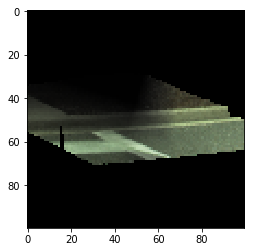

In [21]:
plt.imshow(snapshot)
plt.figsize=(10,10)
plt.show()